In [1]:
import sys
import warnings 
warnings.filterwarnings('ignore')
!{sys.executable} -m pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install lightgbm -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'C:\Users\Stream\AppData\Roaming\spsspro\spsspro\lib\python\pyb.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'C:\Users\Stream\AppData\Roaming\spsspro\spsspro\lib\python\pyb.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import numpy as np

ModuleNotFoundError: No module named 'lightgbm'

In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
data1=pd.read_excel('C题数据.xlsx',sheet_name='datat1')
data1

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,1.0,1#,1.715,93.52,77.84,8.130,4.967,777.10,NaN
1,NaN,2#,2.810,96.28,83.20,7.533,19.967,1019.67,36.44
2,2.0,1#,1.830,93.93,86.23,10.470,1.933,795.57,NaN
3,NaN,2#,2.910,96.41,86.65,7.200,24.967,968.63,24.74
4,3.0,1#,1.890,94.12,82.12,11.870,4.300,564.93,NaN
5,NaN,2#,3.425,96.95,94.33,10.133,34.600,643.40,31.45
6,4.0,1#,2.095,94.70,83.01,13.900,11.767,474.50,NaN
7,NaN,2#,3.400,96.93,82.88,10.600,33.900,603.17,19.37
8,5.0,1#,2.235,95.03,86.04,19.230,20.767,347.23,NaN
9,NaN,2#,3.845,97.30,75.97,15.700,54.500,405.83,31.19


In [6]:
#1#是熔喷样品即未插层，2#为插层样品	
data1.drop( index=50,inplace=True)

In [7]:
data1['编号']=data1['编号'].map({
    '1#':'未插层样品',
    '2#':'插层样品'
})

In [8]:
data1['组号']=data1['组号'].fillna(method='ffill')

In [9]:
data1

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,1.0,未插层样品,1.715,93.52,77.84,8.130,4.967,777.10,NaN
1,1.0,插层样品,2.810,96.28,83.20,7.533,19.967,1019.67,36.44
2,2.0,未插层样品,1.830,93.93,86.23,10.470,1.933,795.57,NaN
3,2.0,插层样品,2.910,96.41,86.65,7.200,24.967,968.63,24.74
4,3.0,未插层样品,1.890,94.12,82.12,11.870,4.300,564.93,NaN
5,3.0,插层样品,3.425,96.95,94.33,10.133,34.600,643.40,31.45
6,4.0,未插层样品,2.095,94.70,83.01,13.900,11.767,474.50,NaN
7,4.0,插层样品,3.400,96.93,82.88,10.600,33.900,603.17,19.37
8,5.0,未插层样品,2.235,95.03,86.04,19.230,20.767,347.23,NaN
9,5.0,插层样品,3.845,97.30,75.97,15.700,54.500,405.83,31.19


In [10]:
data2=pd.read_excel('C题数据.xlsx',sheet_name='data2')
data2

,Unnamed: 0,Unnamed: 1,800,900,1000,1100,1200
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,NaN,21.0,22.0,23.0,24.0,25.0
4,25,NaN,16.0,17.0,18.0,19.0,20.0
5,30,NaN,11.0,12.0,13.0,14.0,15.0
6,35,NaN,6.0,7.0,8.0,9.0,10.0
7,40,NaN,1.0,2.0,3.0,4.0,5.0
8,表格里的编号为组号，与data1第一列对应,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
del data2['Unnamed: 1']

In [12]:
data2.dropna(how='any',inplace=True)
data2

,Unnamed: 0,800,900,1000,1100,1200
3,20,21.0,22.0,23.0,24.0,25.0
4,25,16.0,17.0,18.0,19.0,20.0
5,30,11.0,12.0,13.0,14.0,15.0
6,35,6.0,7.0,8.0,9.0,10.0
7,40,1.0,2.0,3.0,4.0,5.0


In [13]:
mapping1={}
mapping2={}
for i in range(5):
    for j in range(5):
        mapping1[data2.values[i,j+1]]=data2.values[i,0]
for i in range(5):
    for j in range(5):
        mapping2[data2.values[i,j+1]]=data2.columns[j+1]
  

In [14]:
print(mapping1)

{21.0: 20, 22.0: 20, 23.0: 20, 24.0: 20, 25.0: 20, 16.0: 25, 17.0: 25, 18.0: 25, 19.0: 25, 20.0: 25, 11.0: 30, 12.0: 30, 13.0: 30, 14.0: 30, 15.0: 30, 6.0: 35, 7.0: 35, 8.0: 35, 9.0: 35, 10.0: 35, 1.0: 40, 2.0: 40, 3.0: 40, 4.0: 40, 5.0: 40}


In [15]:
print(mapping2)

{21.0: 800, 22.0: 900, 23.0: 1000, 24.0: 1100, 25.0: 1200, 16.0: 800, 17.0: 900, 18.0: 1000, 19.0: 1100, 20.0: 1200, 11.0: 800, 12.0: 900, 13.0: 1000, 14.0: 1100, 15.0: 1200, 6.0: 800, 7.0: 900, 8.0: 1000, 9.0: 1100, 10.0: 1200, 1.0: 800, 2.0: 900, 3.0: 1000, 4.0: 1100, 5.0: 1200}


In [16]:
data1[r'接收距离']=data1['组号'].map(mapping1)
data1[r'热风速度(r/min)']=data1['组号'].map(mapping2)
data1.head()

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）,接收距离,热风速度(r/min)
0,1.0,未插层样品,1.715,93.52,77.84,8.130,4.967,777.10,NaN,40,800
1,1.0,插层样品,2.810,96.28,83.20,7.533,19.967,1019.67,36.44,40,800
2,2.0,未插层样品,1.830,93.93,86.23,10.470,1.933,795.57,NaN,40,900
3,2.0,插层样品,2.910,96.41,86.65,7.200,24.967,968.63,24.74,40,900
4,3.0,未插层样品,1.890,94.12,82.12,11.870,4.300,564.93,NaN,40,1000


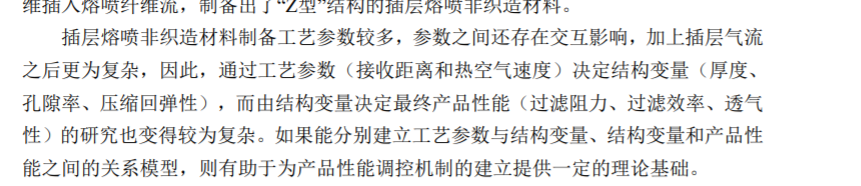

In [17]:
#工艺参数
processPara=['接收距离', '热风速度(r/min)']
#结构变量
StructuralVar=['厚度mm', '孔隙率（%）', '压缩回弹性率（%）']
#产品性能
ProductPerfor=['过滤阻力Pa', '过滤效率（%）', '透气性 mm/s']

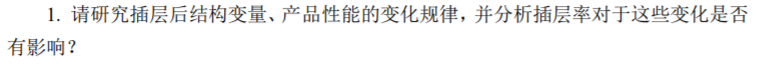

In [18]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
#取消科学计数法
import  pandas as pd
import numpy as np
pd.set_option("display.float_format", lambda x: "%.2f" % x) #为了直观的显示数字，不采用科学计数法
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

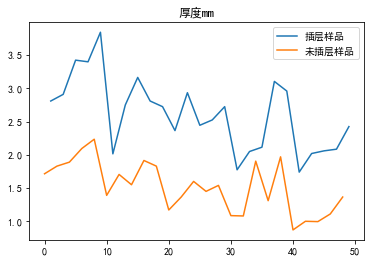

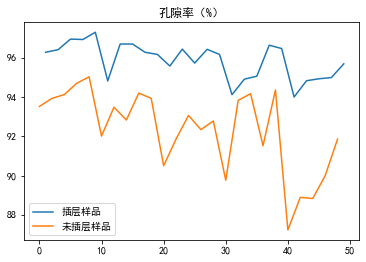

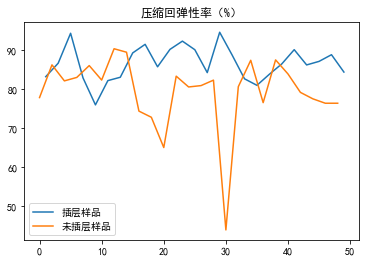

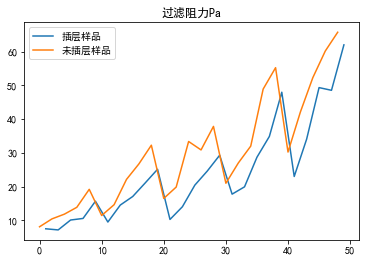

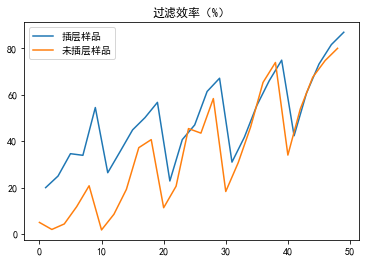

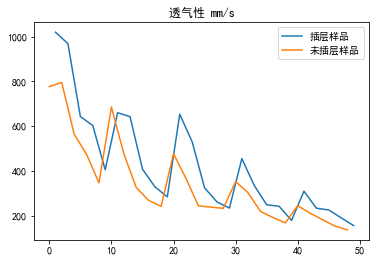

In [29]:
%matplotlib inline  



for i in StructuralVar:
    plt.plot(data1[data1['编号']=='插层样品'][i],label='插层样品')
    plt.plot(data1[data1['编号']=='未插层样品'][i],label='未插层样品')
    plt.title(i)
    plt.legend()
    plt.savefig('./jpg/%s.jpg'%(i[:4]))
    plt.show()
    

for i in ProductPerfor:
    plt.plot(data1[data1['编号']=='插层样品'][i],label='插层样品')
    plt.plot(data1[data1['编号']=='未插层样品'][i],label='未插层样品')
    plt.title(i)
    plt.legend()
    plt.savefig('./jpg/%s.jpg'%(i[:4]))
    plt.show()
    

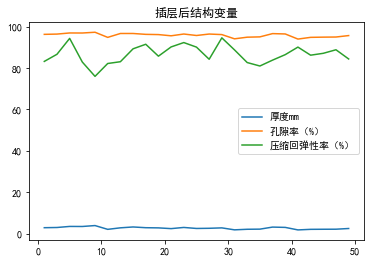

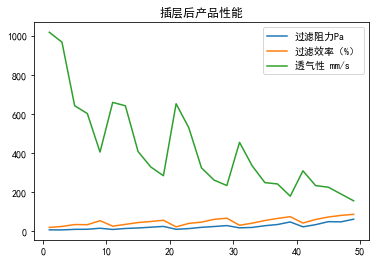

In [30]:

for i in StructuralVar:
    plt.plot(data1[data1['编号']=='插层样品'][i],label=i)

plt.title('插层后结构变量')
plt.legend()
plt.savefig('./jpg/插层后结构变量.jpg')
plt.show()
    
for i in ProductPerfor:
    plt.plot(data1[data1['编号']=='插层样品'][i],label=i)

plt.title('插层后产品性能')
plt.legend()
plt.savefig('./jpg/插层后产品性能.jpg')
plt.show()


In [31]:
import numpy as np
from sklearn.decomposition import PCA
X = data1[StructuralVar]
pca = PCA(n_components=1)   #降到1维
pca.fit(X)                  #训练
StructuralVar_newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率

[0.93739613]


In [32]:
X = data1[ProductPerfor]
pca = PCA(n_components=1)   #降到1维
pca.fit(X)                  #训练
ProductPerfor_newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率

[0.99277045]


In [33]:
data1['结构变量']=StructuralVar_newX
data1['产品性能']=ProductPerfor_newX

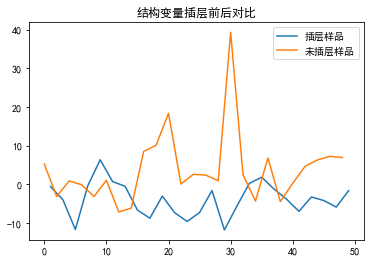

In [35]:
plt.plot(data1[data1['编号']=='插层样品']['结构变量'],label='插层样品')
plt.plot(data1[data1['编号']=='未插层样品']['结构变量'],label='未插层样品')
plt.title('结构变量插层前后对比')
plt.legend()
plt.savefig('./jpg/结构变量插层前后对比.jpg')
plt.show()


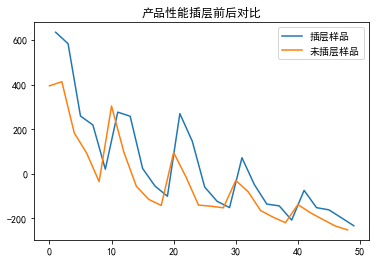

In [36]:
plt.plot(data1[data1['编号']=='插层样品']['产品性能'],label='插层样品')
plt.plot(data1[data1['编号']=='未插层样品']['产品性能'],label='未插层样品')
plt.title('产品性能插层前后对比')
plt.legend()
plt.savefig('./jpg/产品性能插层前后对比.jpg')
plt.show()


In [37]:
data1.to_excel('data1.xlsx',index=None)

In [38]:
from spsspro.algorithm import quantify_analysis


In [39]:
data1['插层率（%）_填补']=data1['插层率（%）'].fillna(0)

In [40]:
data1.columns

Index(['组号', '编号', '厚度mm', '孔隙率（%）', '压缩回弹性率（%）', '过滤阻力Pa', '过滤效率（%）',
       '透气性 mm/s', '插层率（%）', '接收距离', '热风速度(r/min)', '结构变量', '产品性能',
       '插层率（%）_填补'],
      dtype='object')

In [41]:
#生成案例数据
f = data1[StructuralVar+ProductPerfor]
m = data1['插层率（%）_填补']
i = data1['组号']
#灰色关联分析，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
print(quantify_analysis.grey_relational_analysis(f, m, i))

{'correlation_coefficient_result': {'data': {'index': [1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 8.0, 8.0, 9.0, 9.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 15.0, 15.0, 16.0, 16.0, 17.0, 17.0, 18.0, 18.0, 19.0, 19.0, 20.0, 20.0, 21.0, 21.0, 22.0, 22.0, 23.0, 23.0, 24.0, 24.0, 25.0, 25.0], 'data': [[0.13119533527696797, 0.002405902480752781, 0.0028905447070914705, 0.027675276752767534, 0.04529897322327363, 0.0002895380259940807], [0.006690454950936667, 0.0037600267379679156, 0.004811804961505562, 0.007783581831390325, 0.013658714259697693, 0.00022883760666375118], [0.12295081967213119, 0.002395400830405622, 0.002609300707410415, 0.021489971346704877, 0.11639937920331096, 0.0002828160941211962], [0.010306917086578108, 0.0031393888656341576, 0.0036343078662574714, 0.012827822120866597, 0.9911894273127744, 0.00023837523440231392], [0.1190476190476191, 0.002390565235869104, 0.002739892839746713, 0.018955349620893017, 0.05232558139534886, 0.000

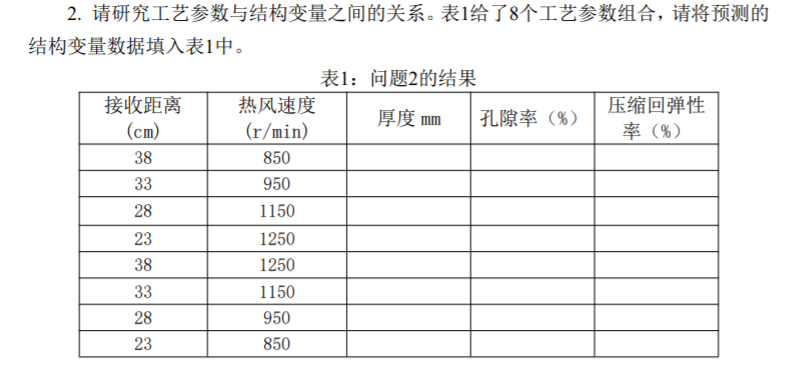

In [43]:
#第二题改用data3的数据
data3=pd.read_excel('C题数据.xlsx',sheet_name='data3')
data3

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
0,40,800,2.77,96.20,84.76,24.76,48.21,654.15
1,40,800,2.75,95.88,84.97,26.01,51.44,609.85
2,40,800,2.76,95.97,84.65,26.22,49.68,635.11
3,40,900,3.05,96.11,85.32,27.17,48.60,521.79
4,40,900,3.05,96.92,85.37,25.32,45.96,553.85
...,...,...,...,...,...,...,...,...
70,20,1100,2.33,95.01,86.63,28.86,80.01,206.12
71,20,1100,2.33,95.31,85.90,30.56,81.99,206.34
72,20,1200,2.42,96.05,85.25,28.30,83.10,209.18
73,20,1200,2.40,95.59,85.14,27.50,83.20,208.57


In [45]:
#工艺参数
processPara=['接收距离(cm)', '热风速度(r/min)']
#结构变量
StructuralVar=['厚度mm', '孔隙率（%）', '压缩回弹性率（%）']
#产品性能
ProductPerfor=['过滤阻力Pa', '过滤效率（%）', '透气性 mm/s']

X = data3[StructuralVar]
pca = PCA(n_components=1)   #降到1维
pca.fit(X)                  #训练
StructuralVar_newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率

X = data3[processPara]
pca = PCA(n_components=1)   #降到1维
pca.fit(X)                  #训练
processPara_newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率


[0.7177163]
[0.99750623]


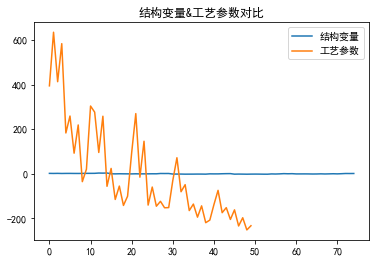

In [46]:

plt.plot(StructuralVar_newX,label='结构变量')
plt.plot(ProductPerfor_newX,label='工艺参数')
plt.title('结构变量&工艺参数对比')
plt.legend()
plt.savefig('./jpg/结构变量&工艺参数对比.jpg')
plt.show()


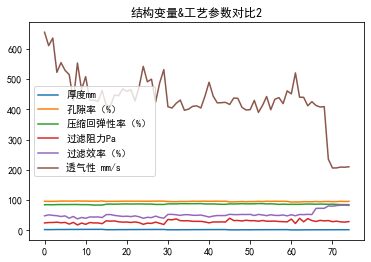

In [48]:
for i in StructuralVar:
    plt.plot(data3[i ],label=i)
for i in ProductPerfor:
    plt.plot(data3[i],label=i)
    
plt.title('结构变量&工艺参数对比2')
plt.legend()
plt.savefig('./jpg/结构变量&工艺参数对比2.jpg')
plt.show()


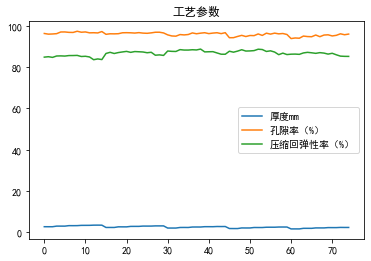

In [50]:
for i in StructuralVar:
    plt.plot(data3[i ],label=i)

    
plt.title('工艺参数')
plt.legend()
plt.savefig('./jpg/工艺参数.jpg')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


X=data3[processPara]

y=data3['厚度mm']
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
    
#线性回归
model = LinearRegression()

model.fit(x_train, y_train)
print('线性回归')
print(mape(model.predict(x_test),y_test))


# Randomforest回归

model = RandomForestRegressor()

model.fit(x_train, y_train)
print('Randomforest回归')
print(mape(model.predict(x_test),y_test))

# lgbm回归
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
print('lgbm回归')
print(mape(model.predict(x_test),y_test))


线性回归
2.2351742411397377
Randomforest回归
0.9564778662015845
lgbm回归
6.187362353985533


In [52]:

model = RandomForestRegressor()

model.fit(X, y)

test=np.array([[38,850],
              [33,950],
              [28,1150],
              [23,1250],
              [38,1250],
              [33,1150],
              [28,950],
              [23,850]])
model.predict(test)

array([2.75558919, 2.70101014, 2.7705687 , 2.60933903, 3.51268543,
       3.06835076, 2.39839415, 1.89195373])

In [53]:

y=data3['孔隙率（%）']
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
    
#线性回归
model = LinearRegression()

model.fit(x_train, y_train)
print('线性回归')
print(mape(model.predict(x_test),y_test))


# Randomforest回归

model = RandomForestRegressor()

model.fit(x_train, y_train)
print('Randomforest回归')
print(mape(model.predict(x_test),y_test))

# lgbm回归
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
print('lgbm回归')
print(mape(model.predict(x_test),y_test))


线性回归
0.3393389604029046
Randomforest回归
0.28308011706551334
lgbm回归
0.3321154556835989


In [54]:

model = RandomForestRegressor()
model.fit(X, y)

test=np.array([[38,850],
              [33,950],
              [28,1150],
              [23,1250],
              [38,1250],
              [33,1150],
              [28,950],
              [23,850]])
model.predict(test)

array([96.02189166, 96.4141741 , 96.38395187, 95.99810891, 96.75504973,
       96.41984931, 95.65441533, 94.36198503])

In [55]:

y=data3['压缩回弹性率（%）']
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
    
#线性回归
model = LinearRegression()

model.fit(x_train, y_train)
print('线性回归')
print(mape(model.predict(x_test),y_test))


# Randomforest回归

model = RandomForestRegressor()

model.fit(x_train, y_train)
print('Randomforest回归')
print(mape(model.predict(x_test),y_test))

# lgbm回归
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
print('lgbm回归')
print(mape(model.predict(x_test),y_test))


线性回归
0.8523300653521257
Randomforest回归
0.23365140820901426
lgbm回归
1.0887381077573097


In [56]:

model = RandomForestRegressor()
model.fit(X, y)

test=np.array([[38,850],
              [33,950],
              [28,1150],
              [23,1250],
              [38,1250],
              [33,1150],
              [28,950],
              [23,850]])
model.predict(test)

array([84.81082271, 87.2625217 , 87.3576553 , 86.17493298, 83.79330641,
       87.0815201 , 88.23380997, 87.48972252])

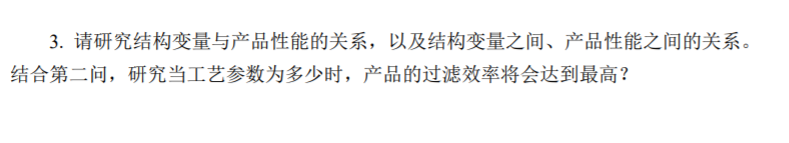

In [57]:
X = data3[StructuralVar]
pca = PCA(n_components=1)   #降到1维
pca.fit(X)                  #训练
StructuralVar_newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率

[0.7177163]


In [58]:
X = data3[ProductPerfor]
pca = PCA(n_components=1)   #降到1维
pca.fit(X)                  #训练
ProductPerfor_newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率

[0.99177965]


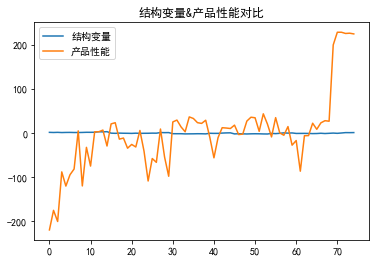

In [59]:
plt.plot(StructuralVar_newX,label='结构变量')
plt.plot(ProductPerfor_newX,label='产品性能')
plt.title('结构变量&产品性能对比')
plt.legend()
plt.savefig('./jpg/结构变量&产品性能对比.jpg')
plt.show()


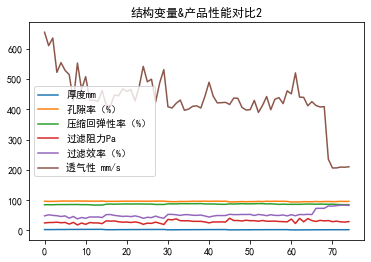

In [60]:

for i in StructuralVar:
    plt.plot(data3[i ],label=i)
for i in ProductPerfor:
    plt.plot(data3[i],label=i)
    
plt.title('结构变量&产品性能对比2')
plt.legend()
plt.savefig('./jpg/结构变量&产品性能对比2.jpg')
plt.show()


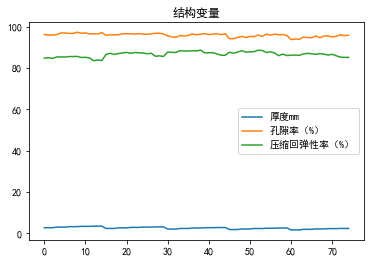

In [61]:

for i in StructuralVar:
    plt.plot(data3[i ],label=i)

    
plt.title('结构变量')
plt.legend()
plt.savefig('./jpg/结构变量.jpg')
plt.show()


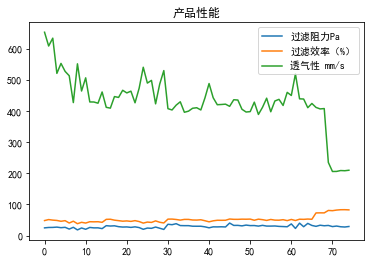

In [62]:
for i in ProductPerfor:
    plt.plot(data3[i],label=i)
plt.title('产品性能')
plt.legend()
plt.savefig('./jpg/产品性能.jpg')
plt.show()


In [63]:
data3.to_excel('data3.xlsx',index=None)

In [64]:
#工艺参数
processPara=['接收距离(cm)', '热风速度(r/min)']
#结构变量
StructuralVar=['厚度mm', '孔隙率（%）', '压缩回弹性率（%）']
#产品性能
ProductPerfor=['过滤阻力Pa', '过滤效率（%）', '透气性 mm/s']

In [65]:
X=data3[processPara]
y=data3['过滤效率（%）']

In [66]:

# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
    
#线性回归
model = LinearRegression()

model.fit(x_train, y_train)
print('线性回归')
print(mape(model.predict(x_test),y_test))


# Randomforest回归

model = RandomForestRegressor()

model.fit(x_train, y_train)
print('Randomforest回归')
print(mape(model.predict(x_test),y_test))

# lgbm回归
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
print('lgbm回归')
print(mape(model.predict(x_test),y_test))

线性回归
10.216057236831498
Randomforest回归
5.117817722723889
lgbm回归
11.706929103690868


In [67]:
X.describe()

,接收距离(cm),热风速度(r/min)
count,75.00,75.00
mean,30.00,1000.00
std,7.12,142.37
min,20.00,800.00
25%,25.00,900.00
50%,30.00,1000.00
75%,35.00,1100.00
max,40.00,1200.00


In [68]:
print(list(range(20,40+1,1)))
print(list(range(800,1200+1,5)))

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065, 1070, 1075, 1080, 1085, 1090, 1095, 1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150, 1155, 1160, 1165, 1170, 1175, 1180, 1185, 1190, 1195, 1200]


In [69]:
test=[]
for i in range(20,40+1,1):
    for j in range(800,1200+1,5):
        test.append([i,j])

In [70]:
len(test)

1701

In [71]:
model = RandomForestRegressor()

model.fit(X, y)



RandomForestRegressor()

In [72]:
model.predict(test)

array([51.12899555, 51.12899555, 51.12899555, ..., 43.79542687,
       43.79542687, 43.79542687])

In [73]:
df=pd.DataFrame(test,columns=processPara)
df['过滤效率（%）']=model.predict(test)
df.head()

,接收距离(cm),热风速度(r/min),过滤效率（%）
0,20,800,51.13
1,20,805,51.13
2,20,810,51.13
3,20,815,51.13
4,20,820,51.13


In [74]:
df['过滤效率（%）'].max()

82.87757767227801

In [75]:
temp=df[df['过滤效率（%）']==df['过滤效率（%）'].max()]
temp

,接收距离(cm),热风速度(r/min),过滤效率（%）
71,20,1155,82.88
72,20,1160,82.88
73,20,1165,82.88
74,20,1170,82.88
75,20,1175,82.88
76,20,1180,82.88
77,20,1185,82.88
78,20,1190,82.88
79,20,1195,82.88
80,20,1200,82.88


In [76]:
temp.describe()

,接收距离(cm),热风速度(r/min),过滤效率（%）
count,30.00,30.00,30.00
mean,21.00,1177.50,82.88
std,0.83,14.61,0.00
min,20.00,1155.00,82.88
25%,20.00,1165.00,82.88
50%,21.00,1177.50,82.88
75%,22.00,1190.00,82.88
max,22.00,1200.00,82.88


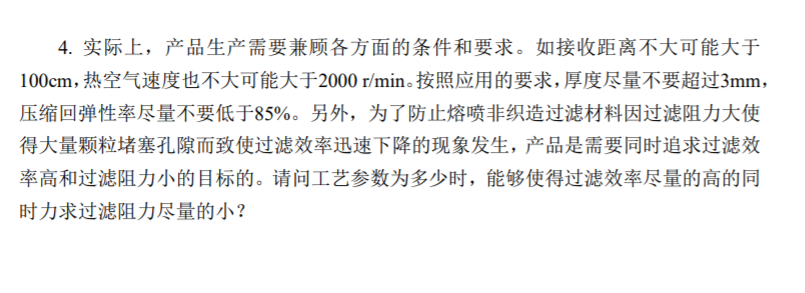


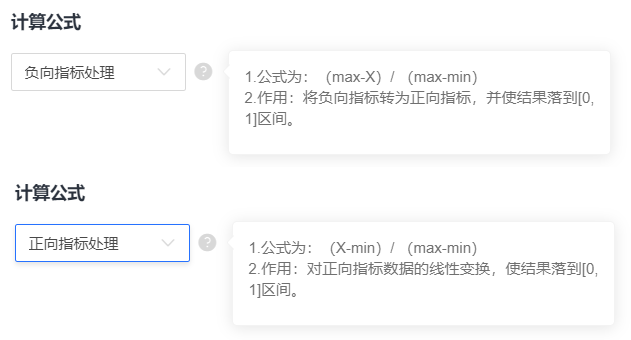

In [77]:
data3['过滤阻力_负向']=(data3['过滤阻力Pa'].max()-data3['过滤阻力Pa'])/(data3['过滤阻力Pa'].max()-data3['过滤阻力Pa'].min())
data3['过滤效率_正向']=(data3['过滤效率（%）']-data3['过滤效率（%）'].min())/(data3['过滤效率（%）'].max()-data3['过滤效率（%）'].min())


In [78]:
data3.head()

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,过滤阻力_负向,过滤效率_正向
0,40,800,2.77,96.20,84.76,24.76,48.21,654.15,0.70,0.22
1,40,800,2.75,95.88,84.97,26.01,51.44,609.85,0.64,0.30
2,40,800,2.76,95.97,84.65,26.22,49.68,635.11,0.63,0.26
3,40,900,3.05,96.11,85.32,27.17,48.60,521.79,0.59,0.23
4,40,900,3.05,96.92,85.37,25.32,45.96,553.85,0.68,0.17


In [79]:
data3['evaluate']=0.5*data3['过滤阻力_负向']+0.5*data3['过滤效率_正向']

#data3['evaluate']=data3['过滤阻力_负向']*data3['过滤效率_正向']

In [80]:
data3.describe()

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,过滤阻力_负向,过滤效率_正向,evaluate
count,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00
mean,30.00,1000.00,2.61,95.88,86.61,28.90,52.03,433.68,0.51,0.31,0.41
std,7.12,142.37,0.47,0.82,1.22,4.60,10.77,85.33,0.21,0.24,0.13
min,20.00,800.00,1.70,93.74,83.52,18.14,38.14,206.12,0.00,0.00,0.17
25%,25.00,900.00,2.33,95.37,85.65,26.15,46.65,409.77,0.38,0.19,0.35
50%,30.00,1000.00,2.61,96.05,86.79,28.57,49.62,429.71,0.53,0.25,0.39
75%,35.00,1100.00,2.92,96.51,87.51,31.81,52.43,464.82,0.64,0.32,0.44
max,40.00,1200.00,3.53,97.28,88.66,40.26,83.20,654.15,1.00,1.00,0.79


In [81]:
#接收距离不大可能大于100cm，热空气速度也不大可能大于2000 r/min。按照应用的要求，厚度尽量不要超过3mm，压缩回弹性率尽量不要低于85%
dftemp=data3[(data3['接收距离(cm)']<=100) &(data3['热风速度(r/min)']<=2000)&(data3['厚度mm']<=3)&(data3['热风速度(r/min)']>=85)]

In [82]:
dftemp.shape

(57, 11)

In [83]:
X=dftemp[processPara]
y=dftemp['evaluate']
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
    
#线性回归
model = LinearRegression()

model.fit(x_train, y_train)
print('线性回归')
print(mape(model.predict(x_test),y_test))


# Randomforest回归

model = RandomForestRegressor()

model.fit(x_train, y_train)
print('Randomforest回归')
print(mape(model.predict(x_test),y_test))

# lgbm回归
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
print('lgbm回归')
print(mape(model.predict(x_test),y_test))

线性回归
35.25353616564556
Randomforest回归
29.9195010746506
lgbm回归
39.00217309275099


In [84]:
#接收距离不大可能大于100cm，热空气速度也不大可能大于2000 r/min。
test=[]
for i in range(20,100+1,2):
    for j in range(800,2000+1,10):
        test.append([i,j])

In [85]:
len(test)

4961

In [86]:
model = RandomForestRegressor()

model.fit(X, y)

model.predict(test)

array([0.30673474, 0.30673474, 0.30673474, ..., 0.43053553, 0.43053553,
       0.43053553])

In [87]:
df=pd.DataFrame(test,columns=processPara)
df['evaluate_pre']=model.predict(test)
df.head()

df['evaluate_pre'].max()

temp=df[df['evaluate_pre']==df['evaluate_pre'].max()]
temp

,接收距离(cm),热风速度(r/min),evaluate_pre
36,20,1160,0.77
37,20,1170,0.77
38,20,1180,0.77
39,20,1190,0.77
40,20,1200,0.77
...,...,...,...
237,22,1960,0.77
238,22,1970,0.77
239,22,1980,0.77
240,22,1990,0.77


In [88]:
temp.describe()

,接收距离(cm),热风速度(r/min),evaluate_pre
count,170.00,170.00,170.00
mean,21.00,1580.00,0.77
std,1.00,246.08,0.00
min,20.00,1160.00,0.77
25%,20.00,1370.00,0.77
50%,21.00,1580.00,0.77
75%,22.00,1790.00,0.77
max,22.00,2000.00,0.77
